In [10]:
dataset=[
    ['양말','넥타이','신발'],
    ['신발','바지','넥타이','셔츠'],
    ['모자','양말','신발'],
    ['신발','바지','넥타이','장갑'] 
]

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te=TransactionEncoder()
te_result=te.fit(dataset).transform(dataset)
print(te_result)
df=pd.DataFrame(te_result,columns=te.columns_)
print(df)

[[ True False False False  True  True False]
 [ True False  True  True  True False False]
 [False  True False False  True  True False]
 [ True False  True False  True False  True]]
     넥타이     모자     바지     셔츠    신발     양말     장갑
0   True  False  False  False  True   True  False
1   True  False   True   True  True  False  False
2  False   True  False  False  True   True  False
3   True  False   True  False  True  False   True


In [12]:
from mlxtend.frequent_patterns import apriori
itemset=apriori(df, use_colnames=True)
itemset

,support,itemsets
0,0.75,(넥타이)
1,0.50,(바지)
2,1.00,(신발)
3,0.50,(양말)
4,0.50,"(넥타이, 바지)"
5,0.75,"(넥타이, 신발)"
6,0.50,"(신발, 바지)"
7,0.50,"(신발, 양말)"
8,0.50,"(넥타이, 신발, 바지)"


In [15]:
itemset=apriori(df, min_support=0.5,use_colnames=True)
itemset

,support,itemsets
0,0.75,(넥타이)
1,0.50,(바지)
2,1.00,(신발)
3,0.50,(양말)
4,0.50,"(넥타이, 바지)"
5,0.75,"(넥타이, 신발)"
6,0.50,"(신발, 바지)"
7,0.50,"(신발, 양말)"
8,0.50,"(넥타이, 신발, 바지)"


In [16]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(itemset, metric="confidence",min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(넥타이),(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
1,(바지),(넥타이),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
2,(넥타이),(신발),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
3,(신발),(넥타이),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
4,(신발),(바지),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(바지),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(신발),(양말),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
7,(양말),(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
8,"(넥타이, 신발)",(바지),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(넥타이, 바지)",(신발),0.50,1.00,0.50,1.000000,1.000000,0.000,inf


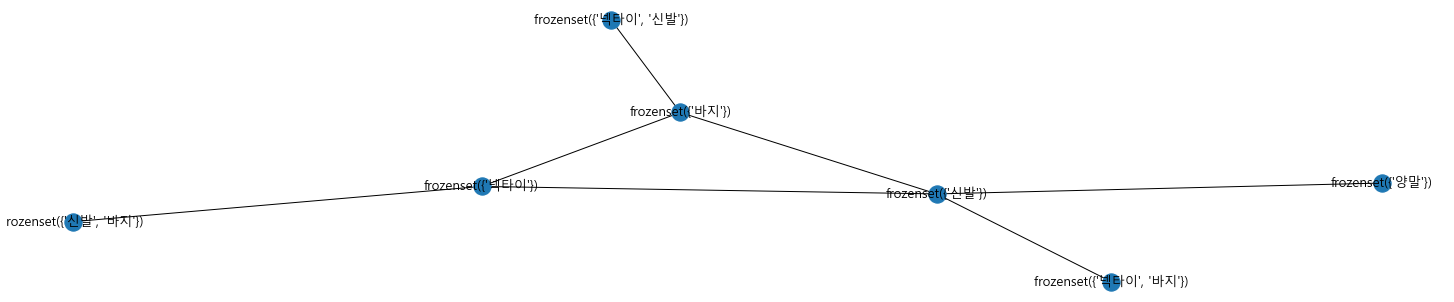

In [17]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt

ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=13)
